In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib import rc
import pickle
import pandas as pd
from scipy.stats import pearsonr
import rasterio

from GCCM_gao import run_GCCM, embedding
%load_ext autoreload
%autoreload 2

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Set specific font sizes
plt.rcParams.update({
    'font.size': 12,          # Global font size
    'axes.titlesize': 11,     # Title font size
    'axes.labelsize': 11,     # X and Y axis labels font size
    'xtick.labelsize': 9,    # X-axis tick labels font size
    'ytick.labelsize': 9,    # Y-axis tick labels font size
    'legend.fontsize': 10,    # Legend font size
})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

## Data

In [6]:
# load data
x = rasterio.open('../Gao_code/raster/dTRI.tif') # cause
xMatrix = x.read(1)
xMatrix = xMatrix.T
y = rasterio.open('../Gao_code/raster/Cu.tif') # effect
yMatrix = y.read(1)
yMatrix = yMatrix.T
z = rasterio.open('../Gao_code/raster/nlights03.tif') # cause
zMatrix = z.read(1)
zMatrix = zMatrix.T
zMatrix = zMatrix.astype(float)

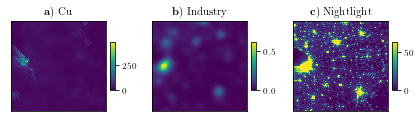

In [417]:
fig, ax = plt.subplots(1,3, figsize=(6, 4))
p0 = ax[0].imshow(yMatrix, origin='lower', interpolation='none')
p1 = ax[1].imshow(xMatrix, origin='lower', interpolation='none')
p2 = ax[2].imshow(zMatrix, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0], fraction=0.046, pad=0.04, aspect=10)
cbar1 = fig.colorbar(p1, ax=ax[1], fraction=0.046, pad=0.04, aspect=10)
cbar2 = fig.colorbar(p2, ax=ax[2], fraction=0.046, pad=0.04, aspect=10)

# Add titles to each subplot
ax[0].set_title(r'$\textbf a)$ Cu')
ax[1].set_title(r'$\textbf b)$ Industry')
ax[2].set_title(r'$\textbf c)$ Nightlight')

# Remove axis tick labels
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('plots/pollution_data.pdf')

## Correlation 

In [250]:
correlation_coefficient, p_value = pearsonr(xMatrix.flatten(), yMatrix[1:, 1:].flatten()) #[:125, :131]
correlation_coefficient, p_value

(0.5081885953981038, 0.0)

In [249]:
correlation_coefficient, p_value = pearsonr(zMatrix.flatten(), yMatrix[1:, 1:].flatten())
correlation_coefficient, p_value

(0.2317785756243964, 1.2863871116548406e-198)

## Embedding

In [113]:
xEmbedings = embedding(xMatrix, E)
yEmbedings = embedding(yMatrix, E)
zEmbedings = embedding(zMatrix, E)

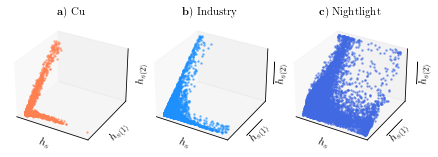

In [376]:
fig, ax = plt.subplots(1,3, figsize=(6, 4), subplot_kw=dict(projection='3d'))
p0 = ax[0].plot(yEmbedings[0].flatten(),np.mean(yEmbedings[1], axis=1),np.mean(yEmbedings[2], axis=1), 
                '.', ms=3, c='coral', alpha=0.5)
pad = -10
ax[0].set_xlabel(r"$h_s$", labelpad=pad)
ax[0].set_ylabel(r"$h_{s(1)}$", labelpad=pad)
ax[0].set_zlabel(r"$h_{s(2)}$", labelpad=-12)
ax[0].set_title(r"$\textbf a)$ Cu")

p1 = ax[1].plot(xEmbedings[0].flatten(),np.mean(xEmbedings[1], axis=1),np.mean(xEmbedings[2], axis=1), 
                '.', ms=3, c='dodgerblue', alpha=0.5)
ax[1].set_xlabel(r"$h_s$", labelpad=pad)
ax[1].set_ylabel(r"$\overline{h_{s(1)}}$", labelpad=pad)
ax[1].set_zlabel(r"$\overline{h_{s(2)}}$", labelpad=-12)
ax[1].set_title(r"$\textbf b)$ Industry")

p2 = ax[2].plot(zEmbedings[0].flatten(),np.mean(zEmbedings[1], axis=1),np.mean(zEmbedings[2], axis=1), 
                '.', ms=3, c='royalblue', alpha=0.5)
ax[2].set_xlabel(r"$h_s$", labelpad=pad)
ax[2].set_ylabel(r"$\overline{h_{s(1)}}$", labelpad=pad)
ax[2].set_zlabel(r"$\overline{h_{s(2)}}$", labelpad=pad)
ax[2].set_title(r"$\textbf c)$ Nightlight")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    a.set_zticks([])

plt.tight_layout()
plt.savefig('plots/pollution_embedding.pdf')

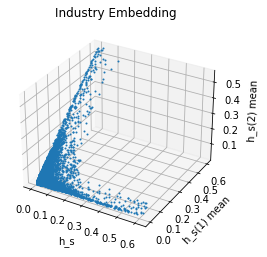

In [121]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(xEmbedings[0].flatten(),np.mean(xEmbedings[1], axis=1),np.mean(xEmbedings[2], axis=1), '.', ms=2 )
#ax.plot(xEmbedings[0].flatten(),np.max(xEmbedings[1], axis=1), np.max(xEmbedings[2], axis=1), '.', ms=2 )
#ax.plot(xEmbedings[0].flatten(),xEmbedings[1][:,-1],xEmbedings[2][:,-1], '.' )
#ax.plot(np.mean(xEmbedings[2], axis=1),np.mean(xEmbedings[1], axis=1),xEmbedings[0].flatten(), '.' )
#ax.plot(np.mean(xEmbedings[1], axis=1),np.mean(xEmbedings[2], axis=1),np.mean(xEmbedings[3], axis=1), '.' )
ax.set_xlabel("h_s")
ax.set_ylabel("h_s(1) mean")
ax.set_zlabel("h_s(2) mean")
ax.set_title("Industry Embedding")

plt.show()

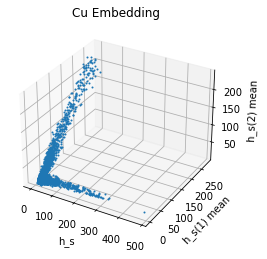

In [114]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(yEmbedings[0].flatten(),np.mean(yEmbedings[1], axis=1),np.mean(yEmbedings[2], axis=1), '.', ms=2 )
#ax.plot(yEmbedings[0].flatten(),yEmbedings[1][:,3],yEmbedings[2][:,3], '.' )

#ax.plot(np.mean(yEmbedings[1], axis=1),np.mean(yEmbedings[2], axis=1),np.mean(yEmbedings[3], axis=1), '.' )
ax.set_xlabel("h_s")
ax.set_ylabel("h_s(1) mean")
ax.set_zlabel("h_s(2) mean")
ax.set_title("Cu Embedding")

plt.show()

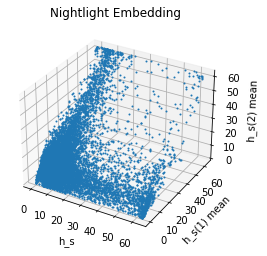

In [115]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(zEmbedings[0].flatten(),np.mean(zEmbedings[1], axis=1),np.mean(zEmbedings[2], axis=1), '.', ms=2 )
#ax.plot(zEmbedings[0].flatten(),zEmbedings[1][:,3],zEmbedings[2][:,3], '.' )

#ax.plot(np.mean(zEmbedings[1], axis=1),np.mean(zEmbedings[2], axis=1),np.mean(zEmbedings[3], axis=1), '.' )
ax.set_xlabel("h_s")
ax.set_ylabel("h_s(1) mean")
ax.set_zlabel("h_s(2) mean")
ax.set_title("Nightlight Embedding")

plt.show()

## Gao results reproduced in python

In [38]:
lib_sizes = np.arange(10,120,20)

In [39]:
# Load the results from file
# python results
with open('gao/Iresults.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('gao/Nresults.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)
# R results
iresultsr = pd.read_csv('../Gao_code/raster/results/Iresults.csv')
nresultsr = pd.read_csv('../Gao_code/raster/results/Nresults.csv')

In [40]:
ix_xmap_y = []
iy_xmap_x = []
for lib in lib_sizes:
    ix_xmap_y.append(iresults['x_xmap_y'][lib]['mean'])
    iy_xmap_x.append(iresults['y_xmap_x'][lib]['mean'])
nx_xmap_y = []
ny_xmap_x = []
for lib in lib_sizes:
    nx_xmap_y.append(nresults['x_xmap_y'][lib]['mean'])
    ny_xmap_x.append(nresults['y_xmap_x'][lib]['mean'])

**x cause**: Industry or Nightlight \
**y effect**: Cu

x xmap y embedding of x variable to predict y (information in x can predict y) so y (Cu) -> x (Industry) \
y xmap x embedding of y variable to predict x (information in  effect y can predict cause x) so x (Industry) -> y (Cu)

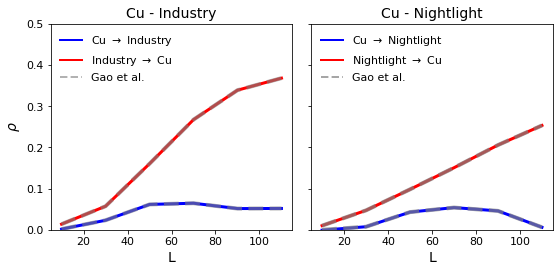

In [278]:
# Appendix figure
fig, ax = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
ax[0].plot(lib_sizes, ix_xmap_y, c='b', lw=3, label = r'Cu $\rightarrow$ Industry')
ax[0].plot(lib_sizes, iy_xmap_x, c='r', lw=3, label = r'Industry $\rightarrow$ Cu')

ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']), '--', c='grey', alpha=0.6, lw=4, label='Gao et al.')
ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']), '--', c='grey', alpha=0.6, lw=4)
ax[0].set_ylim(0,0.5)
ax[0].set_title('Cu - Industry')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend(loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)
    
ax[1].plot(lib_sizes, nx_xmap_y, c='b', lw=3, label = r'Cu $\rightarrow$ Nightlight')
ax[1].plot(lib_sizes, ny_xmap_x, c='r', lw=3, label = r'Nightlight $\rightarrow$ Cu')
ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']), '--', c='grey', alpha=0.7, lw=4, label='Gao et al.')
ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), '--', c='grey', alpha=0.7, lw=4)
ax[1].set_ylim(0,0.5)
ax[1].set_title('Cu - Nightlight')
ax[1].set_xlabel('L')
ax[1].set_ylim(0,0.5)
legend = ax[1].legend(loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.show()

## Corrected results in R

In [418]:
iresultsr_correct = pd.read_csv('../Gao_code/raster_corrected/results/Iresults_corrected.csv')
nresultsr_correct = pd.read_csv('../Gao_code/raster_corrected/results/Nresults_corrected.csv')

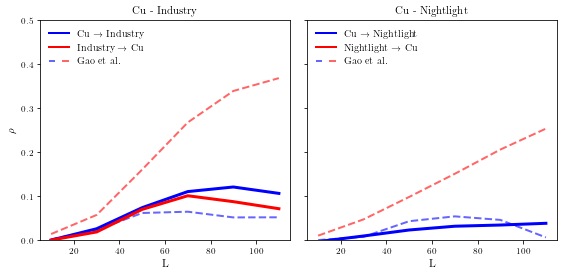

In [420]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']), '--', c='b', alpha=0.6, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']), '--', c='r', alpha=0.6, lw=2)
p3,= ax[0].plot(lib_sizes, list(iresultsr_correct['x_xmap_y_means']),  c='b',  lw=3, label = r'Cu $\rightarrow$ Industry')
p4,= ax[0].plot(lib_sizes, list(iresultsr_correct['y_xmap_x_means']),  c='r',  lw=3, label = r'Industry $\rightarrow$ Cu')


ax[0].set_ylim(0,0.5)
ax[0].set_title('Cu - Industry')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']), '--', c='b', alpha=0.6, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), '--', c='r', alpha=0.6, lw=2)
p3,= ax[1].plot(lib_sizes, list(nresultsr_correct['x_xmap_y_means']),  c='b',  lw=3, label = r'Cu $\rightarrow$ Industry')
p4,= ax[1].plot(lib_sizes, list(nresultsr_correct['y_xmap_x_means']),  c='r',  lw=3, label = r'Industry $\rightarrow$ Cu')
ax[1].set_ylim(0,0.5)
ax[1].set_title('Cu - Nightlight')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']), '--', c='b', alpha=0.6, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']), '--', c='r', alpha=0.6, lw=2)
p3,= ax[0].plot(lib_sizes, list(iresultsr_correct['x_xmap_y_means']),  c='b',  lw=3, label = r'Cu $\rightarrow$ Industry')
p4,= ax[0].plot(lib_sizes, list(iresultsr_correct['y_xmap_x_means']),  c='r',  lw=3, label = r'Industry $\rightarrow$ Cu')


ax[0].set_ylim(0,0.5)
ax[0].set_title('Cu - Industry')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']), '--', c='b', alpha=0.6, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), '--', c='r', alpha=0.6, lw=2)
p3,= ax[1].plot(lib_sizes, list(nresultsr_correct['x_xmap_y_means']),  c='b',  lw=3, label = r'Cu $\rightarrow$ Industry')
p4,= ax[1].plot(lib_sizes, list(nresultsr_correct['y_xmap_x_means']),  c='r',  lw=3, label = r'Industry $\rightarrow$ Cu')
ax[1].set_ylim(0,0.5)
ax[1].set_title('Cu - Nightlight')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.show()

## Corrected results + correct input

In [33]:
# Load the results from file
# python results
with open('corrected/cut_firstr_lastc/Iresults.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('corrected/cut_firstr_lastc/Nresults.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)

In [36]:
ix_xmap_y_cut = []
iy_xmap_x_cut = []
for lib in lib_sizes:
    ix_xmap_y_cut.append(iresults['x_xmap_y'][lib]['mean'])
    iy_xmap_x_cut.append(iresults['y_xmap_x'][lib]['mean'])
nx_xmap_y_cut = []
ny_xmap_x_cut = []
for lib in lib_sizes:
    nx_xmap_y_cut.append(nresults['x_xmap_y'][lib]['mean'])
    ny_xmap_x_cut.append(nresults['y_xmap_x'][lib]['mean'])

In [43]:
# Load the results from file
# python results
with open('corrected/cut_lastr_lastc/Iresults.pkl', 'rb') as pickle_file:
    iresults = pickle.load(pickle_file)
with open('corrected/cut_lastr_lastc/Nresults.pkl', 'rb') as pickle_file:
    nresults = pickle.load(pickle_file)

In [44]:
ix_xmap_y_cut2 = []
iy_xmap_x_cut2 = []
for lib in lib_sizes:
    ix_xmap_y_cut2.append(iresults['x_xmap_y'][lib]['mean'])
    iy_xmap_x_cut2.append(iresults['y_xmap_x'][lib]['mean'])
nx_xmap_y_cut2 = []
ny_xmap_x_cut2 = []
for lib in lib_sizes:
    nx_xmap_y_cut2.append(nresults['x_xmap_y'][lib]['mean'])
    ny_xmap_x_cut2.append(nresults['y_xmap_x'][lib]['mean'])

In [ ]:
# cut yMatrix

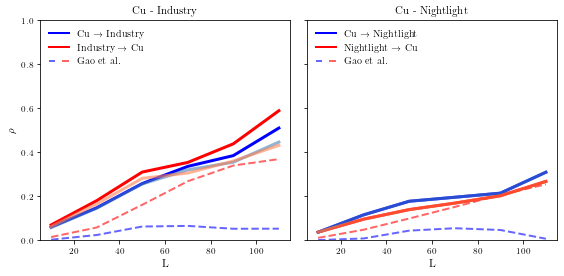

In [46]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)
p1,= ax[0].plot(lib_sizes, list(iresultsr['x_xmap_y_means']), '--', c='b', alpha=0.6, lw=2, label='Gao et al.')
p2,= ax[0].plot(lib_sizes, list(iresultsr['y_xmap_x_means']), '--', c='r', alpha=0.6, lw=2)
p3,= ax[0].plot(lib_sizes, ix_xmap_y_cut,  c='b',  lw=3, label = r'Cu $\rightarrow$ Industry')
p4,= ax[0].plot(lib_sizes, iy_xmap_x_cut,  c='r',  lw=3, label = r'Industry $\rightarrow$ Cu')
ax[0].plot(lib_sizes, ix_xmap_y_cut2,  c='steelblue',  lw=3, label = r'Cu $\rightarrow$ Industry', alpha=0.6)
ax[0].plot(lib_sizes, iy_xmap_x_cut2,  c='coral',  lw=3, label = r'Industry $\rightarrow$ Cu', alpha=0.6)


ax[0].set_ylim(0,1)
ax[0].set_title('Cu - Industry')
ax[0].set_xlabel('L')
ax[0].set_ylabel(r'$\rho$')
legend = ax[0].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Industry', r'Industry $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

p1,= ax[1].plot(lib_sizes, list(nresultsr['x_xmap_y_means']), '--', c='b', alpha=0.6, lw=2, label='Gao et al.')
p2,= ax[1].plot(lib_sizes, list(nresultsr['y_xmap_x_means']), '--', c='r', alpha=0.6, lw=2)
p3,= ax[1].plot(lib_sizes, nx_xmap_y_cut,  c='b',  lw=3, label = r'Cu $\rightarrow$ Industry')
p4,= ax[1].plot(lib_sizes, ny_xmap_x_cut,  c='r',  lw=3, label = r'Industry $\rightarrow$ Cu')
ax[1].plot(lib_sizes, nx_xmap_y_cut,  c='steelblue',  lw=3, label = r'Cu $\rightarrow$ Industry', alpha=0.6)
ax[1].plot(lib_sizes, ny_xmap_x_cut,  c='coral',  lw=3, label = r'Industry $\rightarrow$ Cu', alpha=0.6)
ax[1].set_ylim(0,1)
ax[1].set_title('Cu - Nightlight')
ax[1].set_xlabel('L')
legend = ax[1].legend([p3, p4, (p1, p2)], [r'Cu $\rightarrow$ Nightlight', r'Nightlight $\rightarrow$ Cu', 'Gao et al.'], scatterpoints=1,
               numpoints=1, markerscale=1., handler_map={tuple: HandlerTuple(ndivide=None, pad=0.7)}, 
                      loc='upper left', frameon=False)
for legobj in legend.legendHandles:
    legobj.set_linewidth(2)

plt.tight_layout()
plt.show()